In [1]:
!pip install praw

In [2]:
!pip install wordcloud

In [3]:
import praw
import pandas as pd

reddit = praw.Reddit(
   client_id = '5qJRHRvQPyfpilGjxicAsQ',
   client_secret = 'yev-bSPFp5_czyT4ypp4VuXT14omWA',
   user_agent = 'praw')

# This function returns a Pandas dataframe
# containing reddit post comments, given its id
def getComments(id):
    submission = reddit.submission(id)
    pandas_list = []
    commentsList = submission.comments.list()
    # 'limit' parameter can be increased 
    # in order to expand more comments
    submission.comments.replace_more(limit=64)
    print(len(commentsList))
    i = 0
    for c in commentsList:
        if isinstance(c, praw.models.MoreComments):
            continue
        commentText = c.body
        if commentText in {'[deleted]', '[removed]'}:
            continue
        pandas_list.append([i, commentText])
        i+=1
    df = pd.DataFrame(pandas_list)
    df.columns = ['id', 'description']
    return df

In [4]:
corpus = getComments('1detli')

print(corpus.shape)
corpus.head()

902
(452, 2)


,id,description
0,0,My father passed away last year. One item he ...
1,1,My mom told me this story the other day and it...
2,2,"When I was 15, my mother and I were standing i..."
3,3,Scariest moment of my life happened while my f...
4,4,I saw a 'shadow person' once.\n\nI didn't know...


In [5]:
print('First spooky story : ',corpus.loc[0,'description'])

First spooky story :  My father passed away last year.  One item he always said he wanted me to have was a shotgun which had originally belonged to his grandfather.  For years he had this shotgun stashed in the attic.  After he passed, I had gone in the attic to look for it, only to find that it wasn't there.

A few months later, I had a dream in which I was talking to him and I asked him where he had put the shotgun.  He told me it was in the closet of a spare bedroom.  I called my mother and had her check, and sure enough that's where it was.

Now it's completely possible that my father had told me that when he was alive, and the dream was little more than a memory, but I certainly don't recall that being the case.


In [6]:
import re
from bs4 import BeautifulSoup

corpus['clean_description'] = corpus['description'].apply(lambda x: BeautifulSoup(x, "html.parser").get_text())
corpus['clean_description'] = corpus['clean_description'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

print('Description cleaned of the first product:', corpus.loc[0, 'clean_description'])

Description cleaned of the first product: My father passed away last year  One item he always said he wanted me to have was a shotgun which had originally belonged to his grandfather  For years he had this shotgun stashed in the attic  After he passed I had gone in the attic to look for it only to find that it wasnt there

A few months later I had a dream in which I was talking to him and I asked him where he had put the shotgun  He told me it was in the closet of a spare bedroom  I called my mother and had her check and sure enough thats where it was

Now its completely possible that my father had told me that when he was alive and the dream was little more than a memory but I certainly dont recall that being the case


C:\Users\член\AppData\Local\Temp\ipykernel_30148\3004765970.py:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  corpus['clean_description'] = corpus['description'].apply(lambda x: BeautifulSoup(x, "html.parser").get_text())


In [7]:

corpus['clean_description'] = corpus['clean_description'].apply(lambda x: x.lower())
print('First story lower-cased:', corpus.loc[0, 'clean_description'])

First story lower-cased: my father passed away last year  one item he always said he wanted me to have was a shotgun which had originally belonged to his grandfather  for years he had this shotgun stashed in the attic  after he passed i had gone in the attic to look for it only to find that it wasnt there

a few months later i had a dream in which i was talking to him and i asked him where he had put the shotgun  he told me it was in the closet of a spare bedroom  i called my mother and had her check and sure enough thats where it was

now its completely possible that my father had told me that when he was alive and the dream was little more than a memory but i certainly dont recall that being the case


In [10]:
from nltk.tokenize import word_tokenize 

In [14]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
corpus['clean_tokens'] = corpus['clean_description'].apply(lambda x: word_tokenize(x))
corpus.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\член\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\член\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


,id,description,clean_description,clean_tokens
0,0,My father passed away last year. One item he ...,my father passed away last year one item he a...,"[my, father, passed, away, last, year, one, it..."
1,1,My mom told me this story the other day and it...,my mom told me this story the other day and it...,"[my, mom, told, me, this, story, the, other, d..."
2,2,"When I was 15, my mother and I were standing i...",when i was my mother and i were standing in t...,"[when, i, was, my, mother, and, i, were, stand..."
3,3,Scariest moment of my life happened while my f...,scariest moment of my life happened while my f...,"[scariest, moment, of, my, life, happened, whi..."
4,4,I saw a 'shadow person' once.\n\nI didn't know...,i saw a shadow person once\n\ni didnt know tha...,"[i, saw, a, shadow, person, once, i, didnt, kn..."


In [17]:
### removing stop words
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tag import pos_tag

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
nltk.download('averaged_perceptron_tagger_eng')
def lemmatize(tokens):
    lemmatized_tokens = []
    for token in tokens:
        if token not in stop_words:
            pos = pos_tag([token])[0][1]
            if pos.startswith('NN'):
                lemma = lemmatizer.lemmatize(token, pos='n') 
            elif pos.startswith('VB'):
                lemma = lemmatizer.lemmatize(token, pos='v')  
            elif pos.startswith('JJ'):
                lemma = lemmatizer.lemmatize(token, pos='a')
            else:
                lemma = lemmatizer.lemmatize(token)
            lemmatized_tokens.append(lemma)
    return lemmatized_tokens

corpus['clean_tokens'] = corpus['clean_tokens'].apply(lemmatize)
corpus.head()

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\член\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.


,id,description,clean_description,clean_tokens
0,0,My father passed away last year. One item he ...,my father passed away last year one item he a...,"[father, pass, away, last, year, one, item, al..."
1,1,My mom told me this story the other day and it...,my mom told me this story the other day and it...,"[mom, told, story, day, freak, fuck, old, sist..."
2,2,"When I was 15, my mother and I were standing i...",when i was my mother and i were standing in t...,"[mother, stand, kitchen, talk, rack, wall, hol..."
3,3,Scariest moment of my life happened while my f...,scariest moment of my life happened while my f...,"[scariest, moment, life, happen, friend, camp,..."
4,4,I saw a 'shadow person' once.\n\nI didn't know...,i saw a shadow person once\n\ni didnt know tha...,"[saw, shadow, person, didnt, know, thats, call..."


In [18]:
### tokens in one string
corpus["clean_document"] = corpus["clean_tokens"].apply(lambda tokens: ' '.join(tokens))
corpus.head()

,id,description,clean_description,clean_tokens,clean_document
0,0,My father passed away last year. One item he ...,my father passed away last year one item he a...,"[father, pass, away, last, year, one, item, al...",father pass away last year one item always say...
1,1,My mom told me this story the other day and it...,my mom told me this story the other day and it...,"[mom, told, story, day, freak, fuck, old, sist...",mom told story day freak fuck old sister littl...
2,2,"When I was 15, my mother and I were standing i...",when i was my mother and i were standing in t...,"[mother, stand, kitchen, talk, rack, wall, hol...",mother stand kitchen talk rack wall hold key f...
3,3,Scariest moment of my life happened while my f...,scariest moment of my life happened while my f...,"[scariest, moment, life, happen, friend, camp,...",scariest moment life happen friend camp easter...
4,4,I saw a 'shadow person' once.\n\nI didn't know...,i saw a shadow person once\n\ni didnt know tha...,"[saw, shadow, person, didnt, know, thats, call...",saw shadow person didnt know thats call much l...


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vector
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(corpus["clean_document"])

# X is a generator. We can transform that as an array
X = X.toarray()
print(X.shape)

(452, 3890)


In [20]:
from sklearn.decomposition import TruncatedSVD
# Train SVD model
svd_model = TruncatedSVD(n_components=12) # We test on 12 topics
lsa = svd_model.fit_transform(X)
topic_encoded_df = pd.DataFrame(lsa, columns = ["topic_" + str(i) for i in range(lsa.shape[1])])
topic_encoded_df["documents"] = corpus['clean_description']
topic_encoded_df.head()

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,documents
0,0.194206,-0.054447,-0.133171,0.081752,0.039766,-0.018470,0.001001,-0.103611,0.050553,-0.071092,0.040612,-0.050003,my father passed away last year one item he a...
1,0.244726,-0.027029,-0.191602,0.199662,-0.149927,0.084140,-0.019439,0.000931,-0.161769,-0.091462,-0.039354,-0.142163,my mom told me this story the other day and it...
2,0.175636,-0.014248,-0.050688,-0.092791,-0.006408,0.043834,-0.001542,-0.098104,-0.083826,-0.021913,-0.092249,-0.011914,when i was my mother and i were standing in t...
3,0.265190,-0.080145,0.078319,-0.059727,-0.014823,0.013790,-0.001884,-0.066363,0.233181,0.232404,0.088495,0.147008,scariest moment of my life happened while my f...
4,0.387321,0.001548,0.090241,-0.091146,-0.024275,0.005836,0.017184,-0.096971,0.038258,0.078965,-0.037989,-0.048535,i saw a shadow person once\n\ni didnt know tha...


In [21]:
import numpy as np

def extract_main_topics(x):
    """
    Return the main topic for each document. The main topic is the one that has the maximum value for each row.
    """
    main_topic = x.idxmax() 
    return main_topic

topic_encoded_df.loc[:, 'main_topic'] = 0

for i, row in topic_encoded_df.iloc[:, :-2].iterrows():
    topic_encoded_df.loc[i, 'main_topic'] = extract_main_topics(row)

topic_encoded_df.head()

C:\Users\член\AppData\Local\Temp\ipykernel_30148\832163372.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'topic_0' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  topic_encoded_df.loc[i, 'main_topic'] = extract_main_topics(row)


,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,documents,main_topic
0,0.194206,-0.054447,-0.133171,0.081752,0.039766,-0.018470,0.001001,-0.103611,0.050553,-0.071092,0.040612,-0.050003,my father passed away last year one item he a...,topic_0
1,0.244726,-0.027029,-0.191602,0.199662,-0.149927,0.084140,-0.019439,0.000931,-0.161769,-0.091462,-0.039354,-0.142163,my mom told me this story the other day and it...,topic_0
2,0.175636,-0.014248,-0.050688,-0.092791,-0.006408,0.043834,-0.001542,-0.098104,-0.083826,-0.021913,-0.092249,-0.011914,when i was my mother and i were standing in t...,topic_0
3,0.265190,-0.080145,0.078319,-0.059727,-0.014823,0.013790,-0.001884,-0.066363,0.233181,0.232404,0.088495,0.147008,scariest moment of my life happened while my f...,topic_0
4,0.387321,0.001548,0.090241,-0.091146,-0.024275,0.005836,0.017184,-0.096971,0.038258,0.078965,-0.037989,-0.048535,i saw a shadow person once\n\ni didnt know tha...,topic_0


In [22]:
topic_encoded_df['main_topic'].value_counts()

main_topic
topic_0     233
topic_1      29
topic_2      25
topic_9      24
topic_6      23
topic_10     21
topic_4      20
topic_11     19
topic_3      15
topic_7      15
topic_5      14
topic_8      14
Name: count, dtype: int64

In [23]:
# Create DataFrame containing the description of each topic in terms of the words in the vocabulary
topics_description = pd.DataFrame(svd_model.components_, columns = vectorizer.get_feature_names_out(), 
                                  index = ['topic_' + str(i) for i in range(svd_model.components_.shape[0])])

# Compute absolute values of coefficients
topics_description = topics_description.apply(np.abs, axis = 1)

# Each word is map with a score of relevance for each topic
topics_description.head()

,aaaand,aaand,abandon,abduct,abduction,ability,abject,able,aboard,abominably,...,youll,young,youre,youth,yukon,zag,zig,zimbabwe,zinc,zone
topic_0,0.000818,0.000735,0.006185,0.001968,0.002802,0.007197,0.002443,0.024237,0.001047,0.000819,...,0.005484,0.050587,0.028621,0.001683,0.002984,0.002197,0.002197,0.001252,0.002006,0.002972
topic_1,0.000835,0.001027,0.001749,0.001586,0.001774,0.035001,0.001292,0.007710,0.000631,0.000275,...,0.002981,0.023529,0.058443,0.000821,0.002239,0.002088,0.002088,0.000358,0.000045,0.001667
topic_2,0.000941,0.003083,0.004328,0.002267,0.002858,0.000169,0.020125,0.026895,0.000321,0.000231,...,0.003694,0.002594,0.003435,0.001438,0.003703,0.002602,0.002602,0.000192,0.001742,0.001640
topic_3,0.000448,0.001177,0.001792,0.000331,0.008247,0.000090,0.015155,0.004172,0.000368,0.000859,...,0.000707,0.018771,0.005887,0.000672,0.004207,0.001054,0.001054,0.000579,0.001860,0.003218
topic_4,0.001671,0.006044,0.003700,0.006732,0.015770,0.022935,0.011744,0.002115,0.000708,0.000195,...,0.000836,0.035624,0.082654,0.000996,0.004158,0.001521,0.001521,0.001100,0.000614,0.000310


In [24]:
# Loop over each topic and print the 5 most important words
for i, row in topics_description.iterrows():
    top_words = row.nlargest(5)  
    print(f"Topic {i}:")
    print(top_words)
    print("\n")

Topic topic_0:
like     0.186668
time     0.174037
say      0.168123
house    0.166733
look     0.146463
Name: topic_0, dtype: float64


Topic topic_1:
ghost      0.838283
nice       0.208634
thats      0.120221
mean       0.111306
asshole    0.101076
Name: topic_1, dtype: float64


Topic topic_2:
fuck     0.372378
say      0.288657
story    0.270392
mom      0.251684
thing    0.192219
Name: topic_2, dtype: float64


Topic topic_3:
story    0.308423
fuck     0.305399
door     0.293542
open     0.234230
say      0.196413
Name: topic_3, dtype: float64


Topic topic_4:
alien      0.401604
fuck       0.308680
dream      0.303693
im         0.154476
grandma    0.149165
Name: topic_4, dtype: float64


Topic topic_5:
alien    0.514679
fuck     0.232764
time     0.227906
dude     0.226396
im       0.225998
Name: topic_5, dtype: float64


Topic topic_6:
shit     0.518753
love     0.246872
story    0.232372
scare    0.200492
thats    0.195990
Name: topic_6, dtype: float64


Topic topic_7:
alien 

-------------------------

TOPIC  topic_0


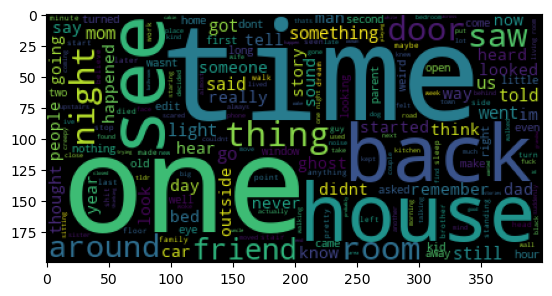


-------------------------

TOPIC  topic_1


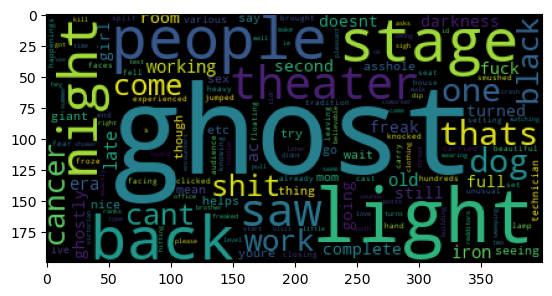


-------------------------

TOPIC  topic_2


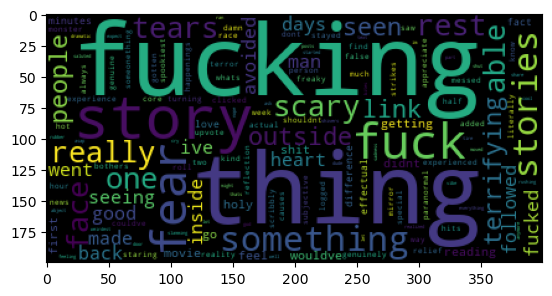


-------------------------

TOPIC  topic_3


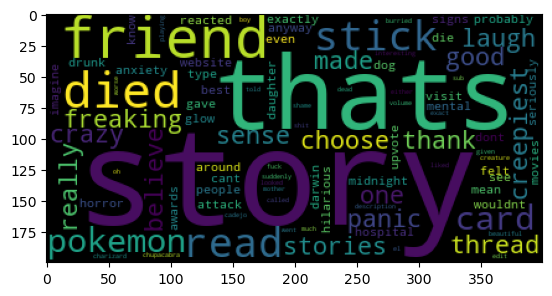


-------------------------

TOPIC  topic_4


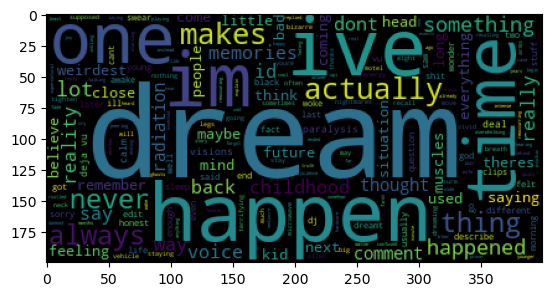


-------------------------

TOPIC  topic_5


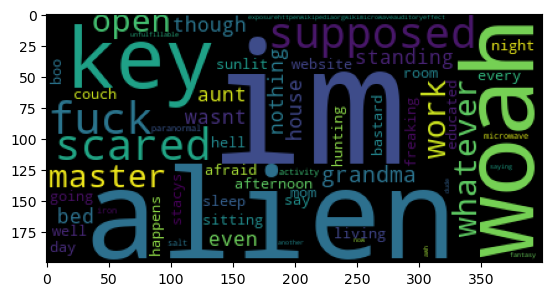


-------------------------

TOPIC  topic_6


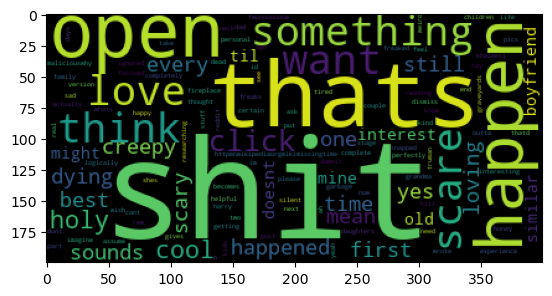


-------------------------

TOPIC  topic_7


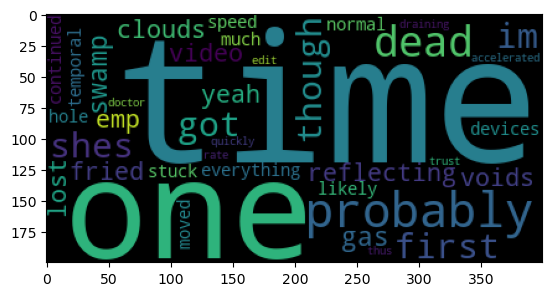


-------------------------

TOPIC  topic_8


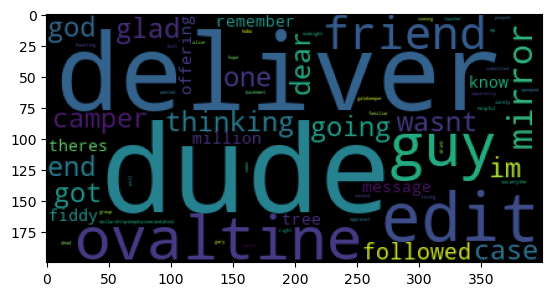


-------------------------

TOPIC  topic_9


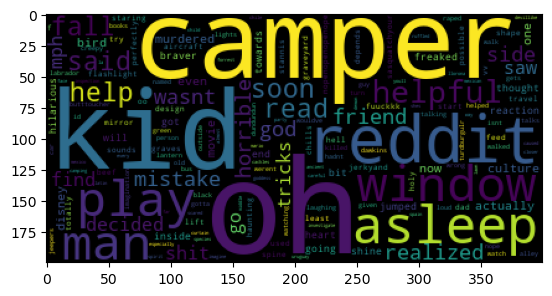


-------------------------

TOPIC  topic_10


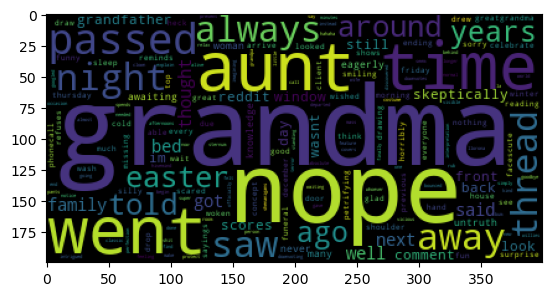


-------------------------

TOPIC  topic_11


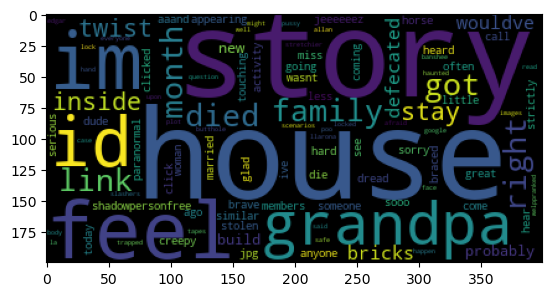

In [25]:
import wordcloud
import matplotlib.pyplot as plt

# Loop over each topic and create wordcloud from documents that are related to this main topic
wd = wordcloud.WordCloud()

cols = [c for c in topic_encoded_df.columns if 'topic_' in c]

for t in cols:
    print('-------------------------')
    print()
    print('TOPIC ', t)
    
    # Handle topics that are not main topics for any document in the corpus
    if (topic_encoded_df['main_topic']==t).any() == False :
        print('cannot create wordcloud for this topic')
        continue
    
    texts = " ".join(topic_encoded_df.loc[topic_encoded_df['main_topic']==t,'documents'])
    cloud = wd.generate(texts)
    plt.imshow(cloud)
    plt.show()
    
    print()

In [26]:
### use doc2vec insted of TF-IDF
import gensim

from gensim.models import Doc2Vec
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text.lower())  
    tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation]
    return tokens

corpus['tokens'] = corpus['clean_document'].apply(preprocess_text)
tagged_data = [gensim.models.doc2vec.TaggedDocument(words=row['tokens'], tags=[str(i)]) for i, row in corpus.iterrows()]

model = Doc2Vec(vector_size=100, window=5, min_count=1, workers=4, epochs=100)
model.build_vocab(tagged_data)
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)
doc_vectors = [model.infer_vector(row['tokens']) for _, row in corpus.iterrows()]

X = np.array(doc_vectors)

print(X.shape)

(452, 100)


In [27]:
from sklearn.decomposition import TruncatedSVD
# Train SVD model
svd_model = TruncatedSVD(n_components=12) # We test on 12 topics
lsa = svd_model.fit_transform(X)
topic_encoded_df = pd.DataFrame(lsa, columns = ["topic_" + str(i) for i in range(lsa.shape[1])])
topic_encoded_df["documents"] = corpus['clean_description']
topic_encoded_df.head()

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,documents
0,4.443824,-0.908274,0.547209,1.310092,-0.348987,0.452095,-0.331292,0.492988,-0.201788,-1.170031,-0.952483,0.893001,my father passed away last year one item he a...
1,5.240980,-2.693532,-0.174080,1.645260,-2.254059,0.900887,0.724360,0.762198,-0.149874,-1.103715,0.135235,-1.634557,my mom told me this story the other day and it...
2,3.618096,0.077786,-0.339473,-1.253860,-1.095484,-0.040984,0.560753,0.783444,1.140314,-0.233107,-1.601528,-2.130043,when i was my mother and i were standing in t...
3,9.218029,5.599612,-3.235380,-1.234209,6.334897,-1.320039,-4.331591,-1.677635,3.345394,0.819594,-1.341083,0.440451,scariest moment of my life happened while my f...
4,8.467585,3.241142,1.949181,-5.937621,1.914037,2.353866,-0.462205,-2.543581,-1.521533,1.261411,-7.476226,0.463093,i saw a shadow person once\n\ni didnt know tha...


In [28]:
import numpy as np

def extract_main_topics(x):
    """
    Return the main topic for each document. The main topic is the one that has the maximum value for each row.
    """
    main_topic = x.idxmax() 
    return main_topic

topic_encoded_df.loc[:, 'main_topic'] = 0

for i, row in topic_encoded_df.iloc[:, :-2].iterrows():
    topic_encoded_df.loc[i, 'main_topic'] = extract_main_topics(row)

topic_encoded_df.head()

C:\Users\член\AppData\Local\Temp\ipykernel_30148\832163372.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'topic_0' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  topic_encoded_df.loc[i, 'main_topic'] = extract_main_topics(row)


,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,documents,main_topic
0,4.443824,-0.908274,0.547209,1.310092,-0.348987,0.452095,-0.331292,0.492988,-0.201788,-1.170031,-0.952483,0.893001,my father passed away last year one item he a...,topic_0
1,5.240980,-2.693532,-0.174080,1.645260,-2.254059,0.900887,0.724360,0.762198,-0.149874,-1.103715,0.135235,-1.634557,my mom told me this story the other day and it...,topic_0
2,3.618096,0.077786,-0.339473,-1.253860,-1.095484,-0.040984,0.560753,0.783444,1.140314,-0.233107,-1.601528,-2.130043,when i was my mother and i were standing in t...,topic_0
3,9.218029,5.599612,-3.235380,-1.234209,6.334897,-1.320039,-4.331591,-1.677635,3.345394,0.819594,-1.341083,0.440451,scariest moment of my life happened while my f...,topic_0
4,8.467585,3.241142,1.949181,-5.937621,1.914037,2.353866,-0.462205,-2.543581,-1.521533,1.261411,-7.476226,0.463093,i saw a shadow person once\n\ni didnt know tha...,topic_0


In [29]:
topic_encoded_df['main_topic'].value_counts()

main_topic
topic_0     440
topic_2       3
topic_3       2
topic_6       2
topic_9       1
topic_1       1
topic_10      1
topic_5       1
topic_11      1
Name: count, dtype: int64

In [30]:
topics_description = pd.DataFrame(svd_model.components_[:, :100], 
                                  columns=vectorizer.get_feature_names_out()[:100], 
                                  index=['topic_' + str(i) for i in range(svd_model.components_.shape[0])])

# Compute absolute values of coefficients
topics_description = topics_description.apply(np.abs, axis=1)

# Each word is mapped with a score of relevance for each topic
topics_description.head()

,aaaand,aaand,abandon,abduct,abduction,ability,abject,able,aboard,abominably,...,alcohol,alert,alien,alive,allan,allergic,alley,allow,alongside,alright
topic_0,0.067683,0.000961,0.020251,0.072863,0.033509,0.140701,0.065148,0.169542,0.088474,0.037689,...,0.178859,0.111331,0.000732,0.027131,0.151442,0.047879,0.014278,0.106935,0.027422,0.035697
topic_1,0.078517,0.030671,0.156011,0.007645,0.041959,0.037992,0.041117,0.069168,0.102693,0.007042,...,0.094826,0.018661,0.006437,0.115377,0.088491,0.139644,0.096257,0.102077,0.017102,0.163802
topic_2,0.033554,0.033978,0.006930,0.107712,0.122826,0.063758,0.081521,0.068777,0.117261,0.142904,...,0.001016,0.007631,0.051849,0.015199,0.018241,0.089668,0.144243,0.023659,0.258887,0.038542
topic_3,0.014628,0.178084,0.010021,0.034396,0.180663,0.282864,0.090797,0.197437,0.161836,0.021449,...,0.136857,0.094497,0.094438,0.088310,0.042726,0.056236,0.062477,0.023450,0.053740,0.027795
topic_4,0.090180,0.028977,0.084545,0.209867,0.015798,0.017215,0.154826,0.029420,0.048567,0.173474,...,0.055344,0.049928,0.104653,0.024694,0.012118,0.098864,0.015063,0.042306,0.096821,0.082294


In [31]:
for i, row in topics_description.iterrows():
    top_words = row.nlargest(5)  
    print(f"Topic {i}:")
    print(top_words)
    print("\n")

Topic topic_0:
air               0.256171
absentmindedly    0.219258
access            0.210761
alcohol           0.178859
advise            0.177846
Name: topic_0, dtype: float32


Topic topic_1:
access         0.284773
acknowledge    0.227404
adjust         0.220239
accompany      0.219271
airport        0.198403
Name: topic_1, dtype: float32


Topic topic_2:
administration    0.259367
alongside         0.258887
album             0.228896
aimless           0.201625
advanced          0.198682
Name: topic_2, dtype: float32


Topic topic_3:
ability    0.282864
advise     0.229681
abuse      0.217191
afford     0.203621
able       0.197437
Name: topic_3, dtype: float32


Topic topic_4:
air         0.238861
aircraft    0.237949
abduct      0.209867
aimless     0.204104
adoptive    0.200417
Name: topic_4, dtype: float32


Topic topic_5:
alley         0.279870
agitate       0.261666
actor         0.223556
abominably    0.222666
abandon       0.218314
Name: topic_5, dtype: float32


Topic to

-------------------------

TOPIC  topic_0


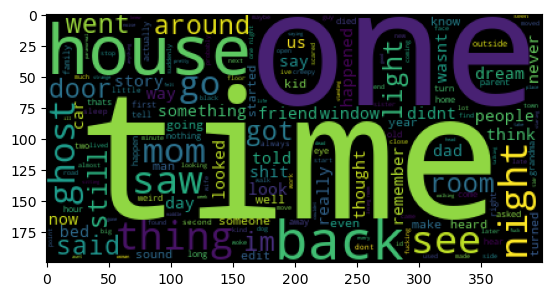


-------------------------

TOPIC  topic_1


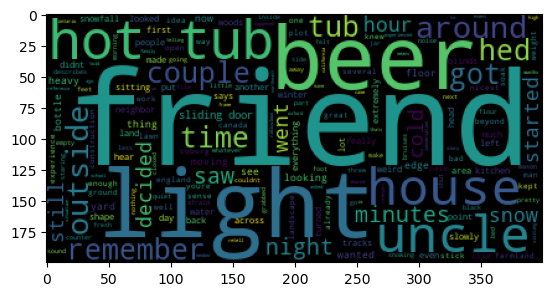


-------------------------

TOPIC  topic_2


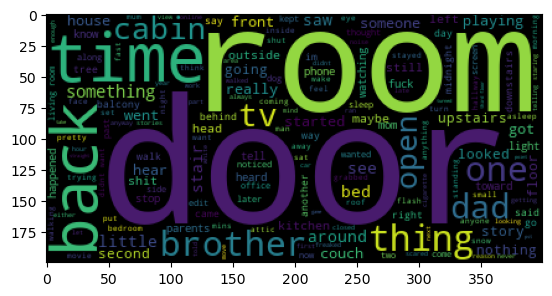


-------------------------

TOPIC  topic_3


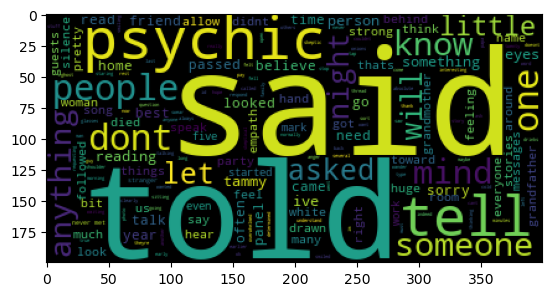


-------------------------

TOPIC  topic_4
cannot create wordcloud for this topic

-------------------------

TOPIC  topic_5


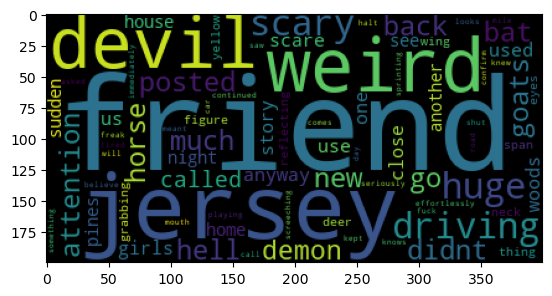


-------------------------

TOPIC  topic_6


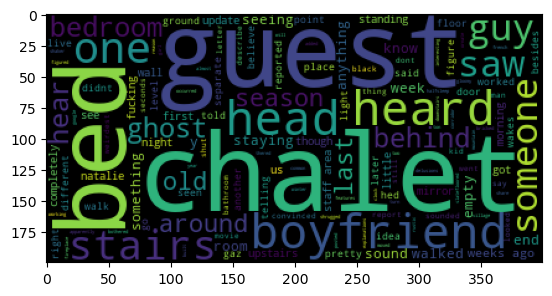


-------------------------

TOPIC  topic_7
cannot create wordcloud for this topic

-------------------------

TOPIC  topic_8
cannot create wordcloud for this topic

-------------------------

TOPIC  topic_9


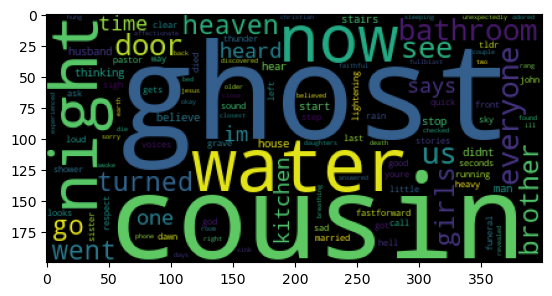


-------------------------

TOPIC  topic_10


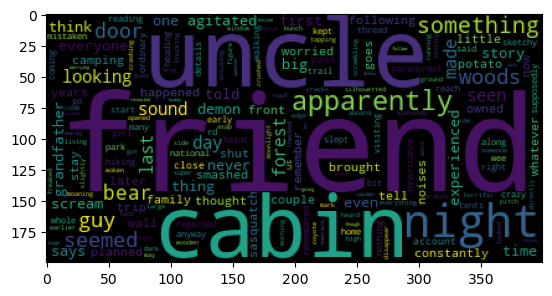


-------------------------

TOPIC  topic_11
cannot create wordcloud for this topic



In [38]:
import wordcloud
import matplotlib.pyplot as plt

wd = wordcloud.WordCloud()

cols = [c for c in topic_encoded_df.columns if 'topic_' in c]

for t in cols:
    print('-------------------------')
    print()
    print('TOPIC ', t)
    try:
        texts = " ".join(topic_encoded_df.loc[topic_encoded_df['main_topic']==t,'documents'])
        cloud = wd.generate(texts)
        plt.imshow(cloud)
        plt.show()
    except Exception:
        print('cannot create wordcloud for this topic')
    print()

In [34]:
!pip install seaborn

C:\Users\член\AppData\Local\Temp\ipykernel_30148\211314082.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  scatter = sns.scatterplot(x='TSNE-1', y='TSNE-2', data=topic_2d_df,


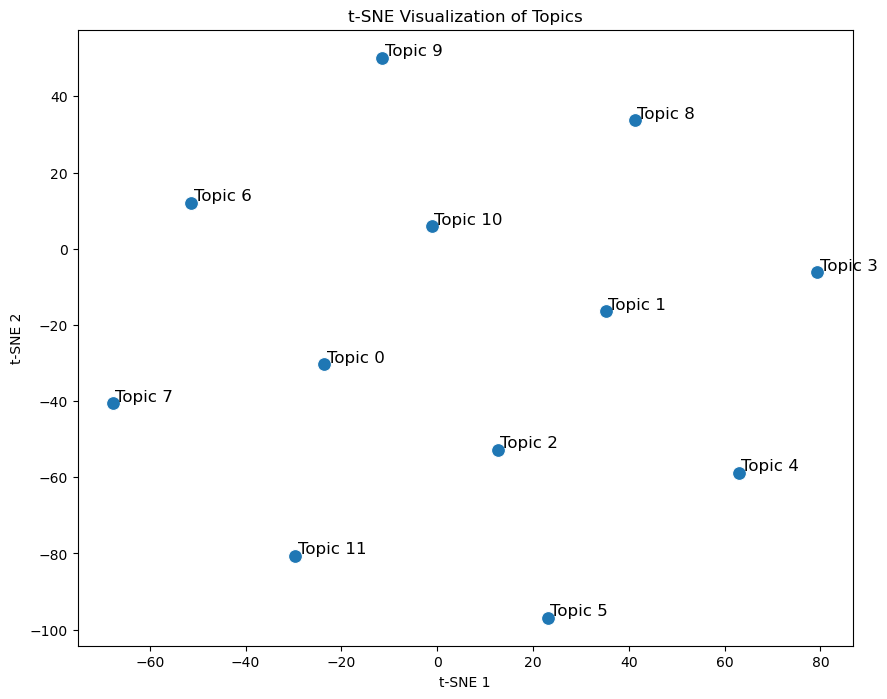

In [35]:
### Add SNE visualization
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
import pandas as pd

topic_vectors = svd_model.components_

n_topics = topic_vectors.shape[0]
perplexity_value = min(30, n_topics - 1)  
tsne = TSNE(n_components=2, 
            random_state=42,
            perplexity=perplexity_value,  
            init='pca',  
            learning_rate='auto')  

topic_2d = tsne.fit_transform(topic_vectors)
topic_2d_df = pd.DataFrame(topic_2d, columns=['TSNE-1', 'TSNE-2'])

plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(x='TSNE-1', y='TSNE-2', data=topic_2d_df, 
                         palette="viridis", s=100)

for i in range(len(topic_2d_df)):
    plt.text(topic_2d_df.loc[i, 'TSNE-1'] + 0.5,  
             topic_2d_df.loc[i, 'TSNE-2'] + 0.5,
             f'Topic {i}', 
             fontsize=12)

plt.title('t-SNE Visualization of Topics')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()